In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
N =1500
t = np.arange(0,N)

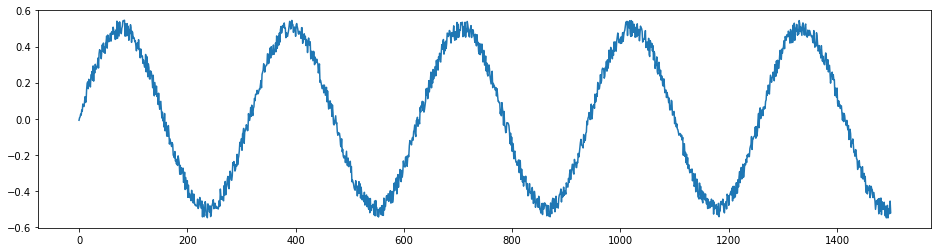

In [3]:
data_sine = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_sine)
plt.show()

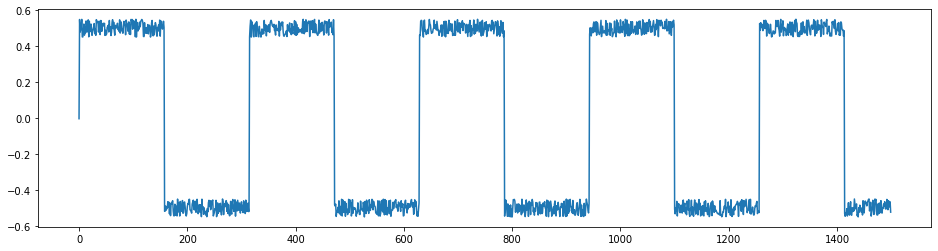

In [4]:
data_square = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_square)
plt.show()

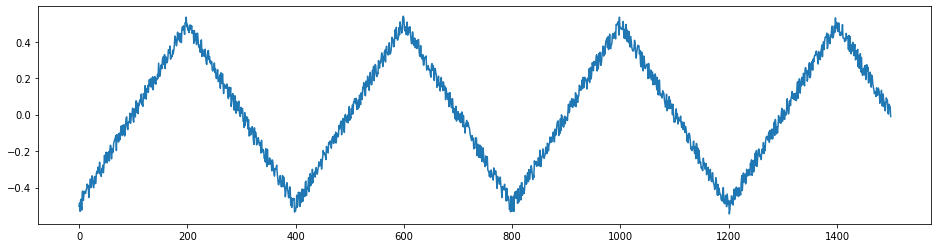

In [5]:
P=200
A=2
data_tringle = ((A/P)*(P-np.abs(t % (2*P)-P))-1)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_tringle)
plt.show()

In [6]:
def convertSignalToDataset(signal,step,label):
  X = []
  Y = []
  for i in range(len(signal)-step):
    j=i + step
    X.append(signal[i:j])
    Y.append(label)
  return np.array(X),np.array(Y)


In [7]:
X_sine,Y_sine = convertSignalToDataset(data_sine,40,label = 0)
X_square,Y_square = convertSignalToDataset(data_square,40,label = 1)
X_tringle,Y_tringle = convertSignalToDataset(data_tringle,40,label = 2)

In [8]:
X = np.concatenate((X_sine, X_square,X_tringle), axis=0)
Y = np.concatenate((Y_sine, Y_square,Y_tringle), axis=0)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size = 0.2)

In [9]:
X_train.shape

(3504, 40)

In [10]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [11]:
X_train.shape

(3504, 40, 1)

In [13]:
model = tf.keras.models.Sequential([
                                    layers.GRU(units=64, input_shape=(None,1)),
                                    layers.Dense(3,activation='softmax')
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [15]:
model.fit(X_train,Y_train,epochs=100,batch_size=16)

Epoch 1/100
219/219 [==============================] - 8s 11ms/step - loss: 1.0554 - accuracy: 0.4138
Epoch 2/100
219/219 [==============================] - 2s 11ms/step - loss: 0.7668 - accuracy: 0.6201
Epoch 3/100
219/219 [==============================] - 2s 11ms/step - loss: 0.6212 - accuracy: 0.6501
Epoch 4/100
219/219 [==============================] - 2s 11ms/step - loss: 0.5937 - accuracy: 0.6581
Epoch 5/100
219/219 [==============================] - 2s 11ms/step - loss: 0.5936 - accuracy: 0.6681
Epoch 6/100
219/219 [==============================] - 2s 11ms/step - loss: 0.5812 - accuracy: 0.6821
Epoch 7/100
219/219 [==============================] - 2s 11ms/step - loss: 0.5616 - accuracy: 0.6807
Epoch 8/100
219/219 [==============================] - 2s 11ms/step - loss: 0.5501 - accuracy: 0.6895
Epoch 9/100
219/219 [==============================] - 2s 11ms/step - loss: 0.5387 - accuracy: 0.6884
Epoch 10/100
219/219 [==============================] - 2s 11ms/step - loss: 0.543

In [16]:
model.evaluate(X_test,Y_test)

28/28 [==============================] - 1s 5ms/step - loss: 0.1078 - accuracy: 0.9475


[0.1077633798122406, 0.9474886059761047]

In [20]:
#sin
x = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
x = x.reshape((1,-1,1))
result = model.predict(x)
print(np.argmax(result))

0


In [18]:
#square
N =40
t = np.arange(0,N)
x = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
y = x.reshape((1,-1,1))
result = model.predict(y)
print(np.argmax(result))

1


In [19]:
#trangle
N = 40
P = 200
A = 2
t = np.arange(0, N)
x = ((A/P)*(P-np.abs(t % (2*P)-P))-1)/2 + np.random.uniform(-0.05,0.05,N)
z = x.reshape((1,-1,1))
result = model.predict(z)
print(np.argmax(result))

2
